In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
X, y = make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=10, random_state=0)
plt.scatter(X, y)

[42.61943029] -0.8141818270307257


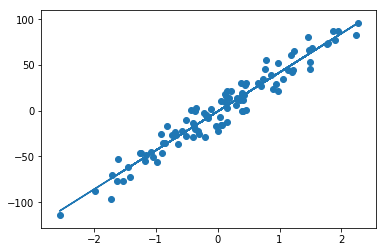

In [2]:
#linear regress using sklearn libs
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

print lr.coef_, lr.intercept_

regressed_y = X*lr.coef_ + lr.intercept_
regressed_y = regressed_y.ravel() #flatten the array

plt.plot(X, regressed_y)
plt.scatter(X, y)

In [3]:
number_of_datapoints = float(len(y))
learning_rate = 0.01
iterations = 1000

#equation of line y = a + bx
#let the initial intercepts be a=0, b=0
a=0
b=0

y_predicted = a + b * X
cost = np.sum((y - y_predicted)**2)/number_of_datapoints
print "original cost : "+ str(cost)
costs_reduction= []

for i in range(iterations):
    
    #find the first derivative of the cost on a and b and minimize it d/da and d/db
    da = 0
    db = 0
    for j in range(len(y)):
        db += -(2/number_of_datapoints) * (y[j] - ((a * X[j]) + b))
        da += -(2/number_of_datapoints) * X[j] * (y[j] - ((a * X[j]) + b))
        
    #adjust a and b
    a = a - (learning_rate * da)
    b = b - (learning_rate * db)
    
    regressed_y = X*a + b
    regressed_y = regressed_y.ravel() #flatten the array
    if i%100 == 0:
        
        plt.subplot(5,2,(i/100)+1)
        plt.title('at iteration'+str(i))
        plt.plot(X,regressed_y)
        plt.scatter(X,y)
    
    new_cost = np.sum((y - regressed_y)**2)/number_of_datapoints
    costs_reduction.append(new_cost)
    
    #find the convergence point
    if np.sum(costs_reduction[-3:])/costs_reduction[-1:] == 3:
        print "convergence point reached at iteration : " + str(i)
        break
    
print "coefficient : "+ str(a)
print "intercept : "+ str(b)


NameError: name 'y_predicted' is not defined

In [ ]:
plt.title("cost reduction over time")
plt.plot(costs_reduction, range(len(costs_reduction)))